In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

DATA CHECKS

-VERİ KONTROLLERİ-

In [2]:
marvel=pd.read_csv("mcu_box_office.csv")
marvel.head()

,movie_title,mcu_phase,release_date,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office
0,Iron Man,1,5/2/2008,94,91,126,"186,000,000","102,118,668","318,604,126","585,171,547"
1,The Incredible Hulk,1,6/13/2008,67,70,112,"137,500,000","55,414,050","134,806,913","265,573,859"
2,Iron Man 2,1,5/7/2010,72,71,124,"170,000,000","128,122,480","312,433,331","621,156,389"
3,Thor,1,5/6/2011,77,76,113,"150,000,000","65,723,338","181,030,624","449,326,618"
4,Captain America: The First Avenger,1,7/22/2011,79,75,124,"140,000,000","65,058,524","176,654,505","370,569,776"


In [5]:
#How Many Rows and Columns does the data have?
#Verilerde Kaç Satır ve Sütun var?
marvel.shape

(27, 10)

In [6]:
#What are the column names?
#Sütun adları nelerdir?
marvel.columns

Index(['movie_title', 'mcu_phase', 'release_date', 'tomato_meter',
       'audience_score', 'movie_duration', 'production_budget',
       'opening_weekend', 'domestic_box_office', 'worldwide_box_office'],
      dtype='object')

In [8]:
#Describe the various values, what are the maximum and minimum values?
#Çeşitli değerleri tanımlayın, maksimum ve minimum değerler nelerdir?
marvel.describe()

,mcu_phase,tomato_meter,audience_score,movie_duration
count,27.000000,27.000000,27.000000,27.000000
mean,2.481481,83.555556,83.740741,131.925926
std,1.014145,11.112479,11.002072,15.531422
min,1.000000,47.000000,45.000000,111.000000
25%,2.000000,79.000000,78.000000,122.500000
50%,3.000000,87.000000,87.000000,130.000000
75%,3.000000,91.500000,91.000000,138.000000
max,4.000000,96.000000,98.000000,181.000000


In [12]:
#Are there any missing values?
#Eksik değerler var mı?
marvel.isna().any().sum()

0

In [13]:
#What are each columns datatypes?
#Her sütun veri türleri nelerdir?
marvel.dtypes

movie_title             object
mcu_phase                int64
release_date            object
tomato_meter             int64
audience_score           int64
movie_duration           int64
production_budget       object
opening_weekend         object
domestic_box_office     object
worldwide_box_office    object
dtype: object

In [16]:
#Converting the budgets from objects into number
#Bütçelerin nesnelerden sayıya dönüştürülmesi
marvel['production_budget'] = marvel['production_budget'].str.split(
    ',').str.join("").astype(float)

marvel['opening_weekend'] = marvel['opening_weekend'].str.split(
    ',').str.join("").astype(float)

marvel['domestic_box_office'] = marvel['domestic_box_office'].str.split(
    ',').str.join("").astype(float)

marvel['worldwide_box_office'] = marvel['worldwide_box_office'].str.split(
    ',').str.join("").astype(float)

In [17]:
marvel.dtypes

movie_title              object
mcu_phase                 int64
release_date             object
tomato_meter              int64
audience_score            int64
movie_duration            int64
production_budget       float64
opening_weekend         float64
domestic_box_office     float64
worldwide_box_office    float64
dtype: object

In [18]:
#Converting Release date to datetime object.
#Yayın tarihini tarih saat nesnesine dönüştürme.
marvel.release_date=pd.to_datetime(marvel.release_date)

In [19]:
marvel.dtypes

movie_title                     object
mcu_phase                        int64
release_date            datetime64[ns]
tomato_meter                     int64
audience_score                   int64
movie_duration                   int64
production_budget              float64
opening_weekend                float64
domestic_box_office            float64
worldwide_box_office           float64
dtype: object

In [22]:
#Does the data contain any duplicate rows?
#Veriler yinelenen satırlar içeriyor mu?
marvel.duplicated().any()

False

DATA VİSUALİZATİON

-VERİ GÖRSELLEŞTİRME-

How were the movies rated by audience and critics?

-Filmler izleyiciler ve eleştirmenler tarafından nasıl derecelendirildi?-

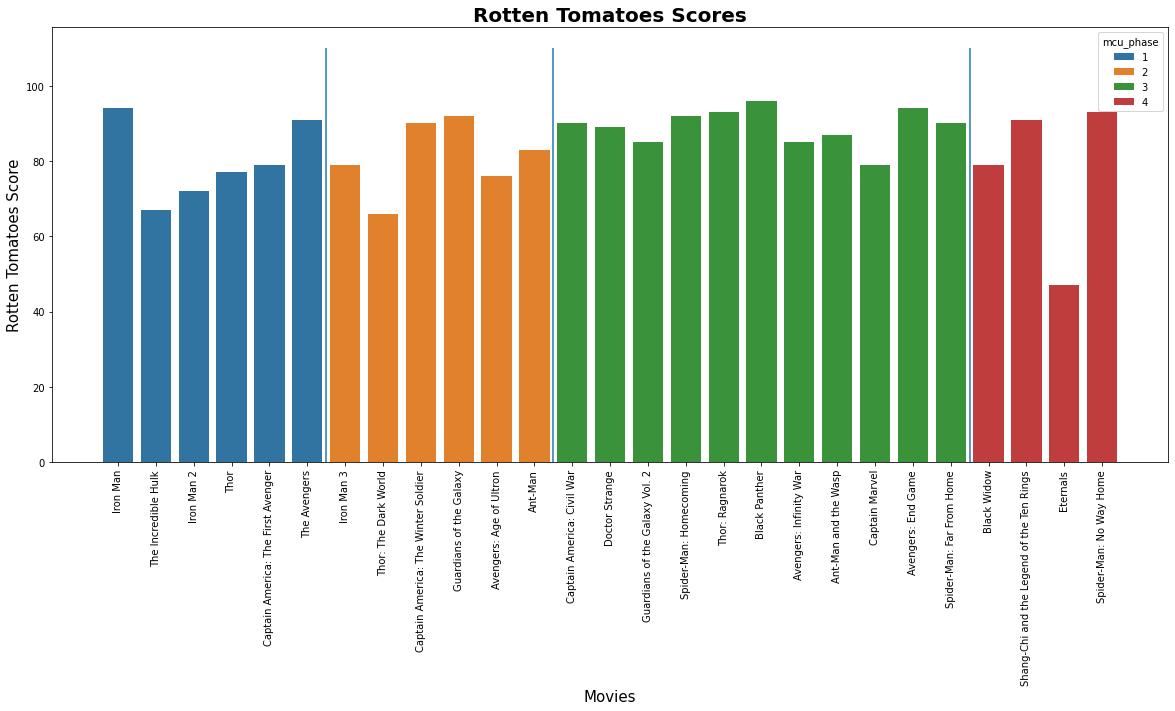

In [23]:
#Rotten Tomatoes Scores for each Marvel Movie
#Her Marvel Filmi için Rotten Tomatoes Puanları

plt.figure(figsize=(20,8))
plt.xticks(rotation=90)

sns.barplot(x="movie_title",y="tomato_meter",
           data=marvel,hue="mcu_phase",dodge=False)
plt.title("Rotten Tomatoes Scores",fontsize=20,fontweight="bold")
plt.xlabel("Movies",fontsize=15)
plt.ylabel("Rotten Tomatoes Score",fontsize=15)
plt.vlines(x=(5.5,11.5,22.5),ymin=0,ymax=110)

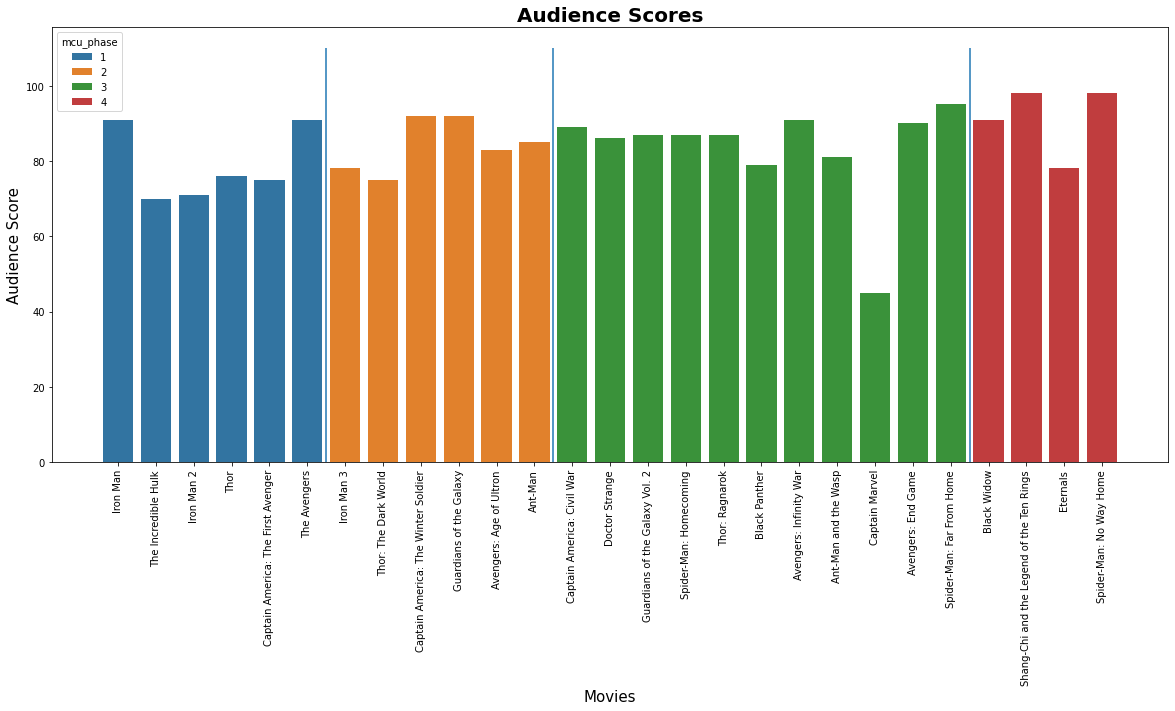

In [24]:
#Audience Scores for each Movie
#Her Film için İzleyici Puanları

plt.figure(figsize=(20,8))
plt.xticks(rotation=90)

sns.barplot(x="movie_title",y="audience_score",
           data=marvel,hue="mcu_phase",dodge=False)
plt.title("Audience Scores",fontsize=20,fontweight="bold")
plt.xlabel("Movies",fontsize=15)
plt.ylabel("Audience Score",fontsize=15)
plt.vlines(x=(5.5,11.5,22.5),ymin=0,ymax=110)


In [26]:
#Comparing the Audience vs RT Scores for each MCU Phase
#Her MCU Aşaması için İzleyici ve RT Puanlarını Karşılaştırma

compare_scores=pd.melt(marvel,id_vars=("movie_title","mcu_phase"),value_vars=("tomato_meter", "audience_score"), 
                       value_name="score", var_name="type")

compare_scores.head()

,movie_title,mcu_phase,type,score
0,Iron Man,1,tomato_meter,94
1,The Incredible Hulk,1,tomato_meter,67
2,Iron Man 2,1,tomato_meter,72
3,Thor,1,tomato_meter,77
4,Captain America: The First Avenger,1,tomato_meter,79


In [27]:
compare_scores.dtypes

movie_title    object
mcu_phase       int64
type           object
score           int64
dtype: object

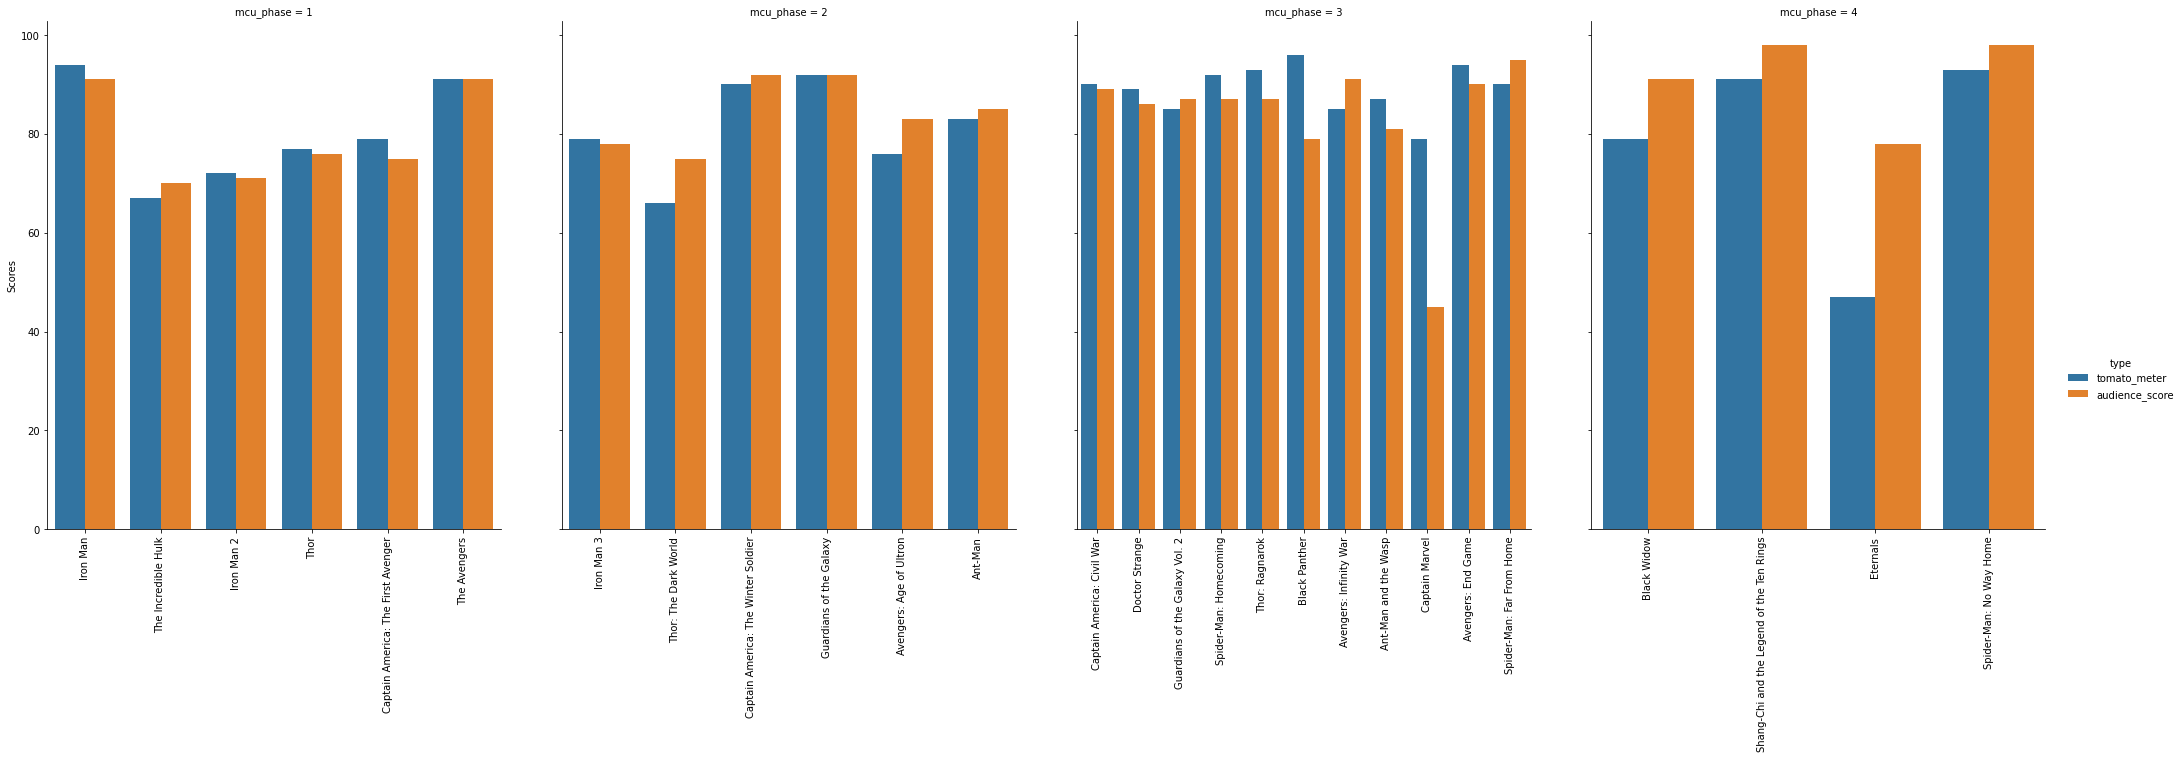

In [28]:
g = sns.catplot(x="movie_title", y="score",
            data=compare_scores, hue="type", col="mcu_phase", kind="bar", dodge=True, sharex=False, aspect=0.9, height=8)
g.set_xticklabels(rotation = 90)
g.set_axis_labels("","Scores")

Text(0, 0.5, 'Score')

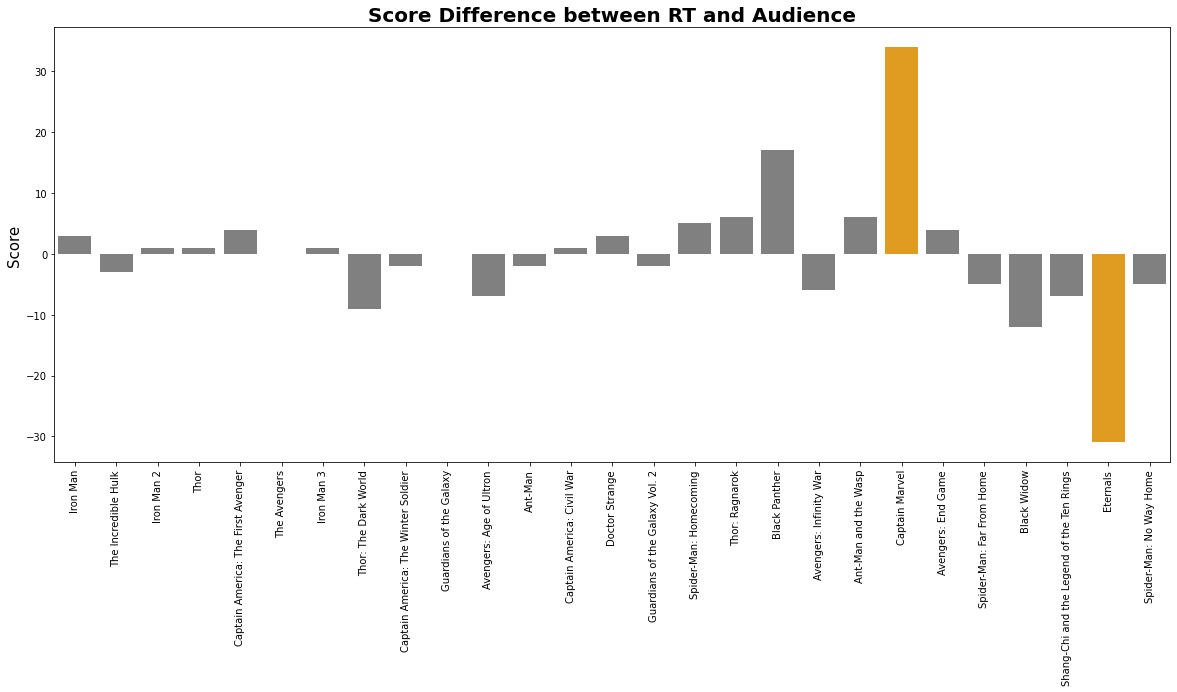

In [30]:
#How different movies split RT critics vs Audience
#Farklı filmler RT eleştirmenlerini İzleyiciye karşı nasıl ayırıyor?

marvel["score_difference"] = marvel["tomato_meter"] - \
    marvel["audience_score"]
plt.figure(figsize=(20, 8))
plt.xticks(rotation=90)

clrs = ['grey' if (min(marvel.score_difference) < x < max(marvel.score_difference)) else 'orange' for x in marvel.score_difference]

sns.barplot(x="movie_title", y="score_difference",
            data=marvel, palette=clrs, dodge=False)

plt.title("Score Difference between RT and Audience",
          fontsize=20, fontweight="bold")
plt.xlabel("")
plt.ylabel("Score", fontsize=15)

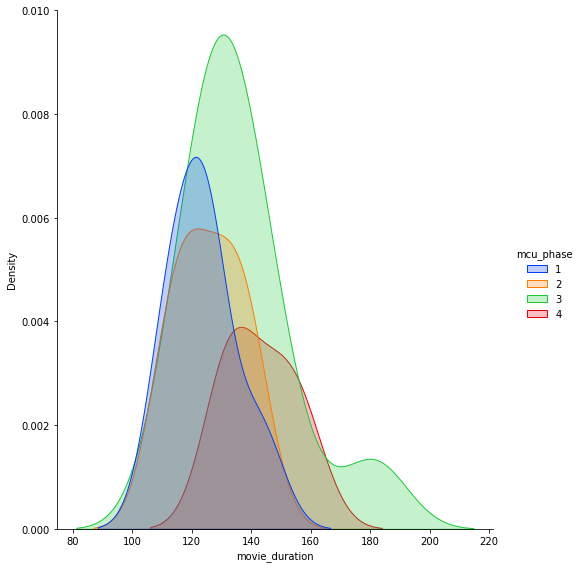

In [31]:
#How long were the movies?
#Filmler ne kadar sürdü?

sns.displot(data=marvel,x="movie_duration",hue="mcu_phase",kind="kde",
           fill=True,palette=sns.color_palette("bright")[:4],height=8,aspect=0.9)

<AxesSubplot:xlabel='movie_title', ylabel='movie_duration'>

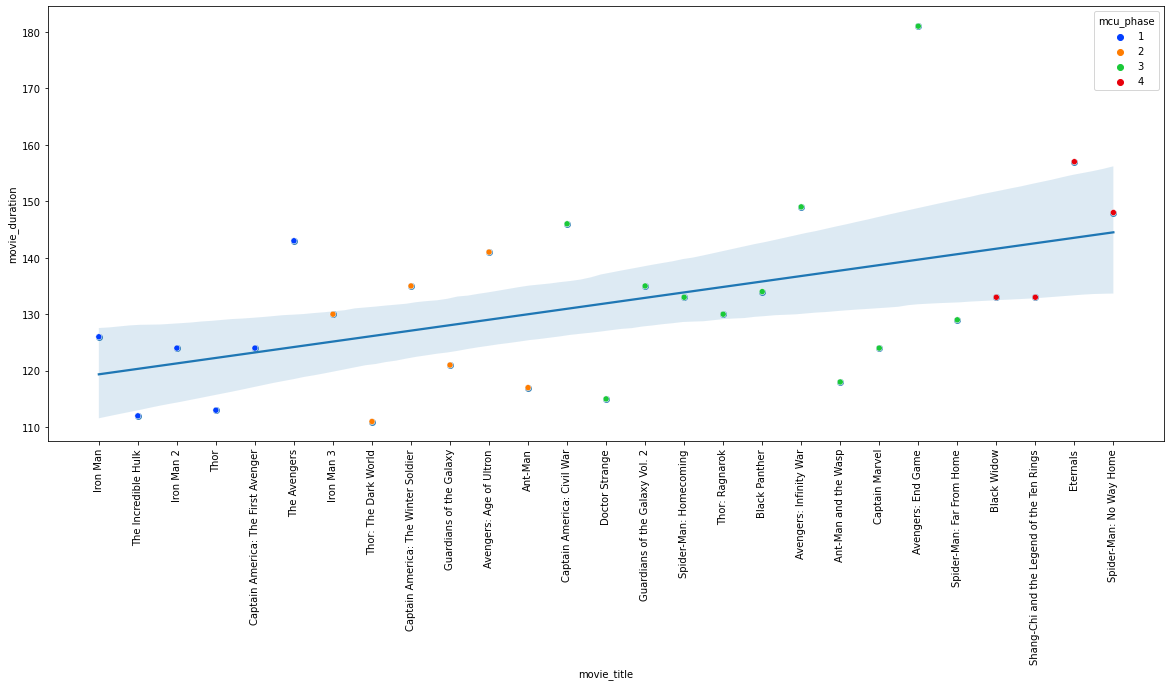

In [35]:
#Have the movies gotten longer?
#Filmler uzadı mı?

plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.regplot(x=marvel.index,y="movie_duration",data=marvel)
sns.scatterplot(data=marvel,x="movie_title",
               y="movie_duration",hue="mcu_phase",palette=sns.color_palette("bright")[:4])

In [36]:
#How much money did the movies make?
#Filmler ne kadar para kazandırdı?

budget=pd.melt(marvel,id_vars=("movie_title","mcu_phase"),value_vars=("production_budget", "opening_weekend", "domestic_box_office", "worldwide_box_office"),
               value_name="budget_value",var_name="budget_type")

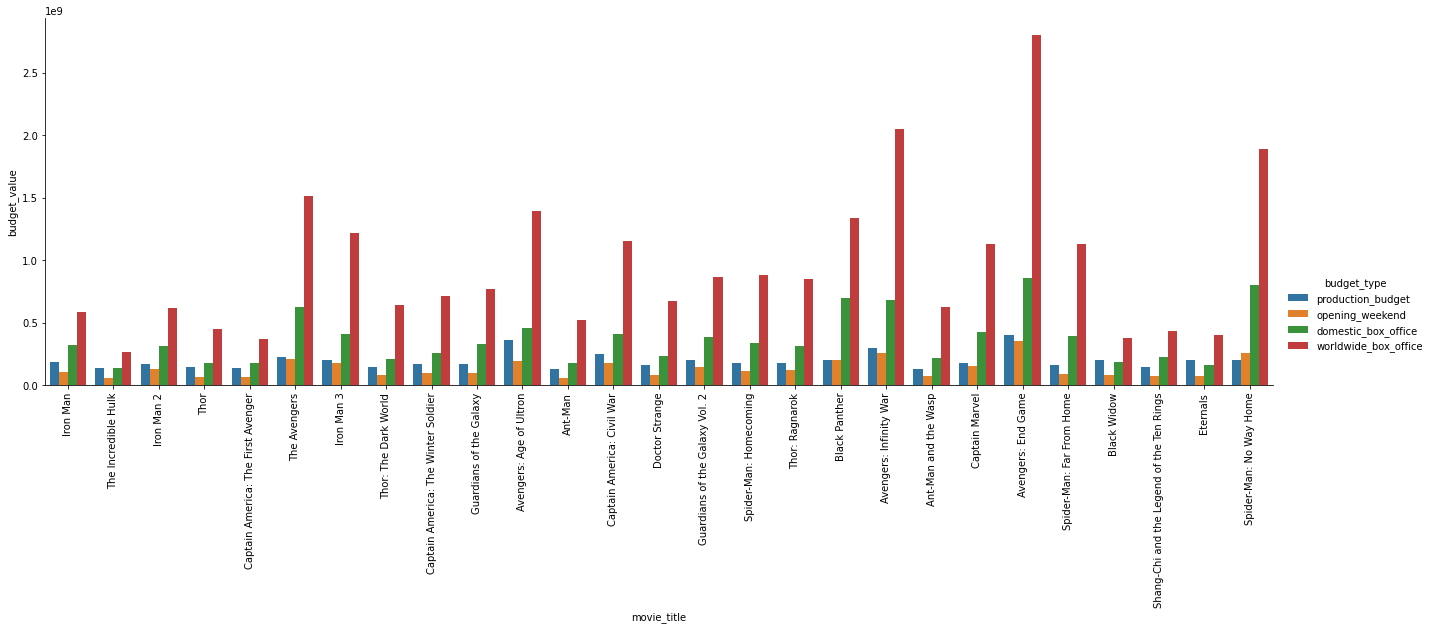

In [37]:
g=sns.catplot(x="movie_title",y="budget_value",
              data=budget,hue="budget_type",kind="bar",dodge=True,sharex=False,aspect=3,height=6)
g.set_xticklabels(rotation=90 )

<AxesSubplot:xlabel='movie_title', ylabel='production_budget'>

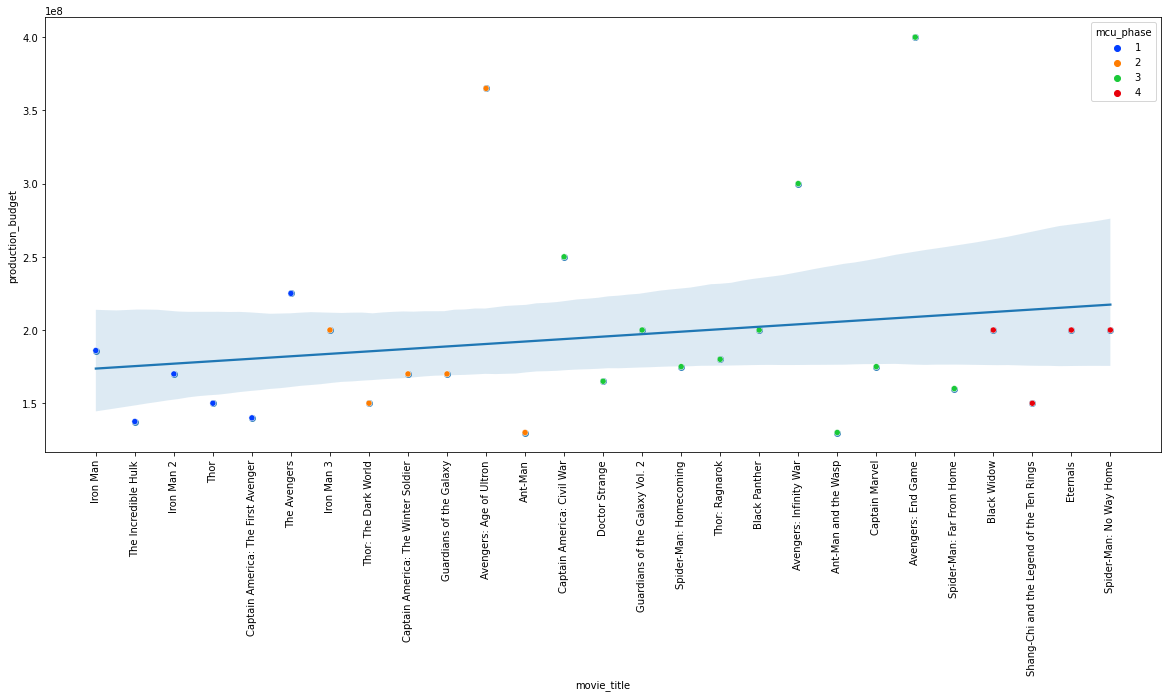

In [43]:
#How did the cost of making marvel movies change overtime?
#Marvel filmleri yapmanın maliyeti fazla mesaiyi nasıl değiştirdi?

plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.regplot(x=marvel.index,y="production_budget",data=marvel)
sns.scatterplot(data=marvel,x="movie_title",y="production_budget",hue="mcu_phase",palette=sns.color_palette("bright")[:4])

In [ ]:
#It looks like the budget remained fairly consistent over time.
#Bütçe zaman içinde oldukça tutarlı

<AxesSubplot:xlabel='movie_title', ylabel='worldwide_box_office'>

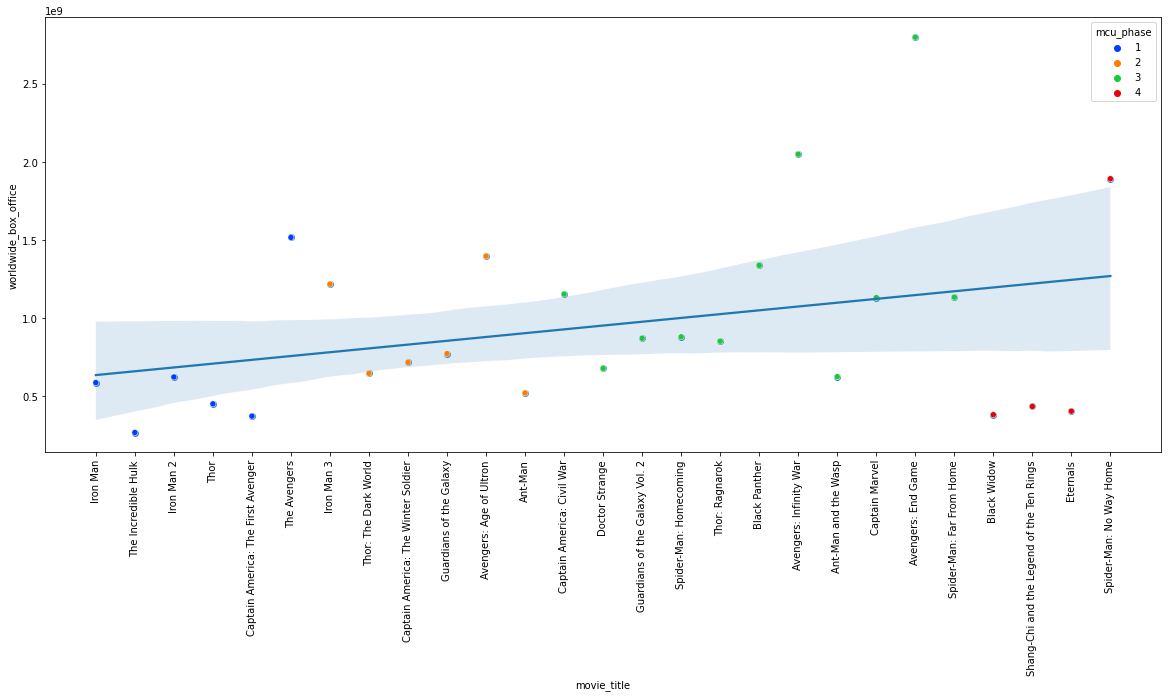

In [45]:
#How does the revenue generated change over time?
#Elde edilen gelir zaman içinde nasıl değişir?

plt.figure(figsize=(20, 8))
plt.xticks(rotation=90)
sns.regplot(x=marvel.index, y="worldwide_box_office", data=marvel)
sns.scatterplot(data=marvel, x="movie_title",
                y="worldwide_box_office", hue="mcu_phase", palette=sns.color_palette('bright')[:4])

In [ ]:
#We see a slight upwards trend here.
#hafif bir yükseliş mevcut


<AxesSubplot:xlabel='movie_title', ylabel='percent_profit_margin'>

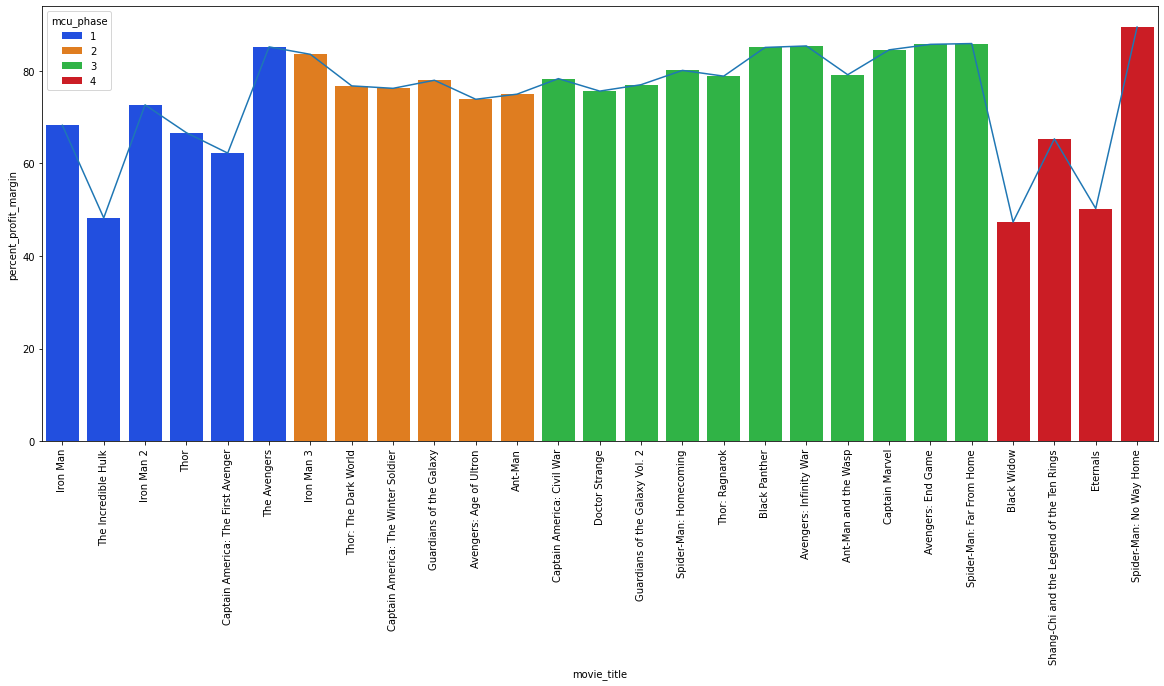

In [47]:
#Lets look at the profit margin
#Kar marjına bakalım

marvel["percent_profit_margin"]=((marvel["worldwide_box_office"]-marvel["production_budget"])/marvel["worldwide_box_office"])*100
plt.figure(figsize=(20, 8))
plt.xticks(rotation=90)

sns.lineplot(x=marvel.index,y="percent_profit_margin",data=marvel)
sns.barplot(data=marvel, x="movie_title",
                y="percent_profit_margin", hue="mcu_phase", palette=sns.color_palette('bright')[:4], dodge=False)

In [50]:
#Breaking down the best performing movies by their domestic vs international box office revenue
#En iyi performans gösteren filmleri yurt içi ve yurt dışı gişe gelirlerine göre ayırıyoruz

marvel["rest_of_world_box_office"]=marvel["worldwide_box_office"]- marvel["domestic_box_office"]

box_office=marvel[["movie_title", "rest_of_world_box_office", "domestic_box_office"]]
box_office=box_office.sort_values("rest_of_world_box_office",ascending=False)

<AxesSubplot:xlabel='movie_title'>

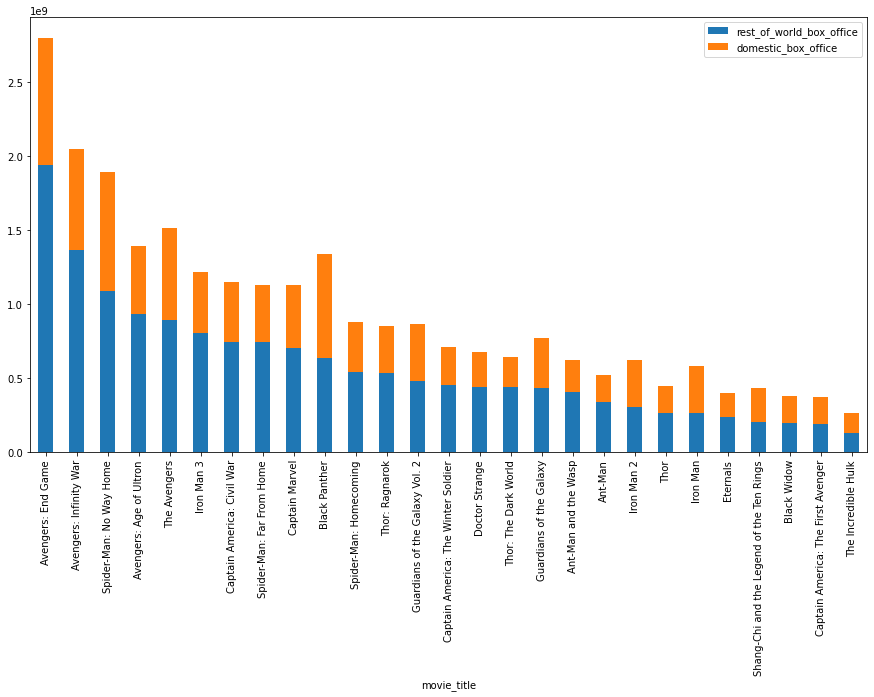

In [51]:
box_office_plot=box_office.set_index("movie_title").plot(kind="bar",stacked=True,figsize=(15,8))
box_office_plot

<AxesSubplot:xlabel='audience_score', ylabel='worldwide_box_office'>

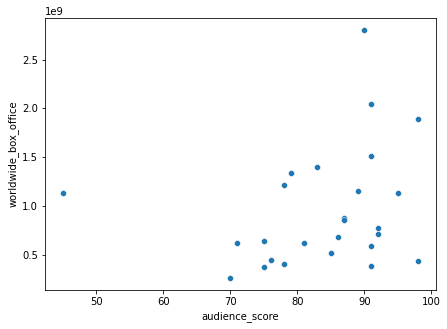

In [53]:
#Does Higher Audience score = More Revenue?
#Daha Yüksek Kitle puanı = Daha Fazla Gelir mi?

plt.figure(figsize=(7,5))
sns.scatterplot(x="audience_score",y="worldwide_box_office",data=marvel)